In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

import pydotplus
import os
os.environ["Path"] += os.pathsep + 'C:\\Users\\Gail\\Anaconda3\\Library\\bin\\graphviz'
from IPython.display import Image


In [11]:
input_file="Wolf.csv"
output_file_pdf="DT Wolf.pdf"
output_file_jpg="DT Wolf.jpg"
df_class_names=['Existence','Non-existence']

In [12]:
def get_df(file):
    dataset = pd.read_csv(file)
    df = pd.DataFrame(dataset)
    df=df.fillna(0)
    return df
df=get_df(input_file)

In [13]:
def get_ds(frame):
    ds=frame.values
    return ds
ds= get_ds(df)

In [14]:
def get_XY(set):
    X=set[:,:-1]
    Y= set[:,-1]
    return X,Y
X,Y = get_XY(ds)

In [15]:
def get_df_feature_names(frame):
    names = list(frame.columns)
    df_feature_names=names[:-1]
    return df_feature_names
df_feature_names = get_df_feature_names(df)

In [16]:
def get_clf(X,Y):
    clf= DecisionTreeClassifier( criterion="gini",  min_impurity_decrease=0.02, random_state=0)
    clf.fit(X, Y)
    return(clf)
clf=get_clf(X,Y)

In [17]:
def plot_dtc(dtc):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=df_feature_names,  
                                class_names=df_class_names)
    graph = pydotplus.graph_from_dot_data(dot_data)  
    graph.write_pdf(output_file_pdf)
    graph.write_jpg(output_file_jpg)
    Image(graph.create_png())
plot_dtc(clf)

In [18]:
def get_graph(clf):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=df_feature_names,  
                                class_names=df_class_names)
    graph = pydotplus.graph_from_dot_data(dot_data) 
    return graph
graph =get_graph(clf)

In [19]:
def save_graph(grpah):
    graph.write_pdf("DT Titanic.pdf")
    graph.write_jpg("DT Titanic.jpg")
save_graph(graph)

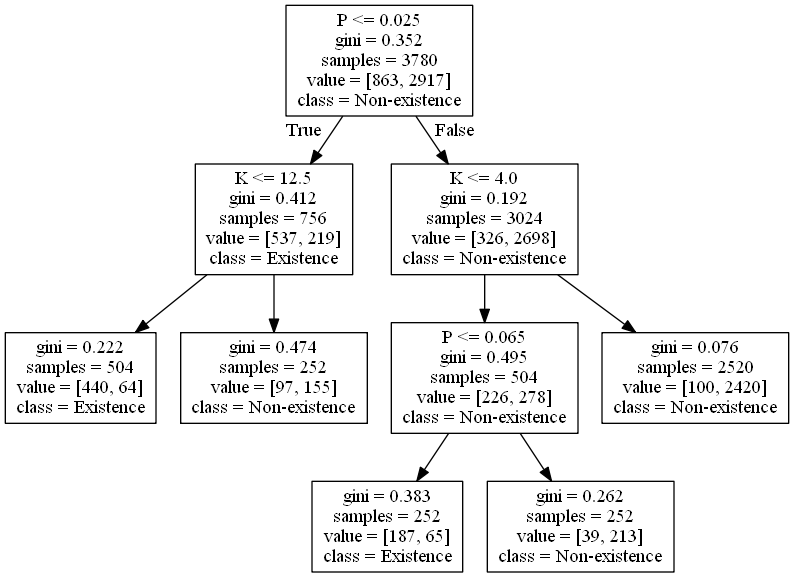

In [20]:
def get_image(graph):
    image=Image(graph.create_png())
    return image
image =get_image(graph)
image